# Análisis del comportamiento de los usuarios a partir del tiempo que se tarda en hacer click a una publicidad

## En base a la distribución de los tiempos se decidirá un <i>cutoff</i> que diferencie entre <i>high</i> y <i>low</i>; tiempos normales y tiempos excepcionalmente rápidos en realizar un click, respectivamente

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style='whitegrid')

clicks = pd.read_csv("/home/fedoremelianenko/FIUBA/Organizacion de datos/TP1/data/clicks.csv",
                     usecols = ['advertiser_id', 'created', 'os_minor', 'os_major', 'timeToClick', 'ref_type',
                               'touchX', 'touchY'])

clicks.sort_values(by=['timeToClick'], inplace = True)
clicks['timeToClick_log'] = np.log(clicks['timeToClick']+1)
clicks.dropna(subset = ['timeToClick', 'timeToClick_log'], inplace = True)

c=0.7

clicks.head()

,advertiser_id,created,os_minor,os_major,timeToClick,touchX,touchY,ref_type,timeToClick_log
22355,3,2019-03-12T17:27:40.367Z,5.975656e+18,3.072849e+18,0.017,0.700,0.607,1891515180541284343,0.016857
8827,3,2019-03-11T14:18:58.250Z,6.768137e+18,3.072849e+18,0.026,0.924,0.389,1891515180541284343,0.025668
22833,3,2019-03-12T20:14:27.270Z,5.975656e+18,3.072849e+18,0.026,0.383,0.537,1891515180541284343,0.025668
15298,3,2019-03-10T10:31:02.489Z,3.025219e+18,1.774085e+18,0.029,0.781,0.512,1891515180541284343,0.028587
3516,3,2019-03-10T12:46:37.199Z,6.391567e+18,7.452406e+18,0.034,0.759,0.961,1891515180541284343,0.033435


# 1. Se realiza una visualización inicial de los tiempos que se tardó en hacer click, basados en frecuencia, mediante un histograma
#### Esta visualización se encuentra en escala logaritmica

/home/fedoremelianenko/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Frecuencia')

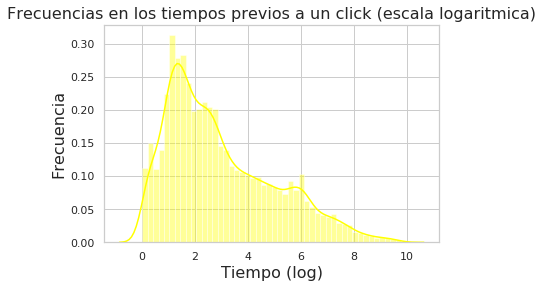

In [2]:
d_plot_todos = sns.distplot(clicks['timeToClick_log'], color='yellow')
d_plot_todos.set_title('Frecuencias en los tiempos previos a un click (escala logaritmica)', fontsize =16)
d_plot_todos.set_xlabel('Tiempo (log)', fontsize = 16)
d_plot_todos.set_ylabel('Frecuencia', fontsize = 16)

#### Fig. 1: Gráfico de densidad de los tiempos en hacer click a un anuncio

### Este gráfico se puede separar en <i>highs</i> y <i>lows</i>:

In [3]:
lowest_click_times = clicks.loc[clicks['timeToClick_log'] < c]
highest_click_times = clicks.loc[clicks['timeToClick_log'] > c]

Text(0,0.5,'Frecuencia')

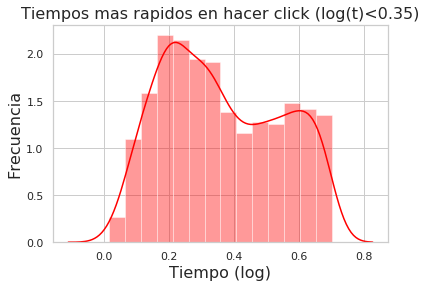

In [4]:
d_plot_lows = sns.distplot(lowest_click_times['timeToClick_log'], color='red')
d_plot_lows.set_title('Tiempos mas rapidos en hacer click (log(t)<0.35)', fontsize=16)
d_plot_lows.set_xlabel('Tiempo (log)', fontsize = 16)
d_plot_lows.set_ylabel('Frecuencia', fontsize = 16)

#### Fig. 2: Gráfico de densidad de tiempos <i>low</i> (escala logaritmica)

Text(0,0.5,'Frecuencia')

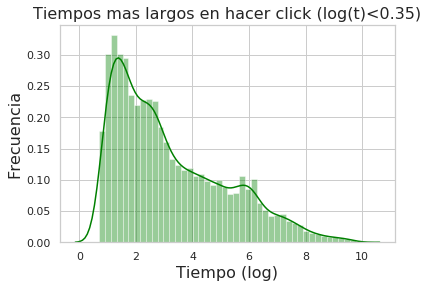

In [5]:
d_plot_highs = sns.distplot(highest_click_times['timeToClick_log'], color='green')
d_plot_highs.set_title('Tiempos mas largos en hacer click (log(t)<0.35)', fontsize=16)
d_plot_highs.set_xlabel('Tiempo (log)', fontsize = 16)
d_plot_highs.set_ylabel('Frecuencia', fontsize = 16)

#### Fig. 3: Gráfico de densidad de tiempos <i>high</i> (escala logaritmica)

In [6]:
clicks['group'] = 'High'
clicks.loc[clicks['timeToClick_log'] < c , 'group'] = 'Low'

# 2. Análisis de tiempo por localización del click
## Con esta categorización, nos disponemos a ver como modifica esto la posición donde se generó el click (relativo al tamaño de la publicidad)
### Se utilizará un scatterplot, y las coordenadas 'touchX' y 'touchY'

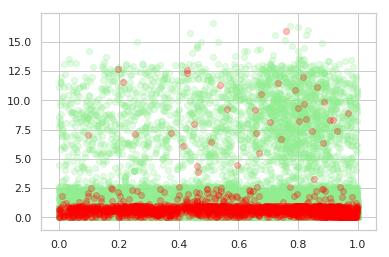

In [7]:
sp = plt.scatter(clicks.loc[clicks['group'] == 'High', 'touchX'],
                 clicks.loc[clicks['group'] == 'High', 'touchY'], alpha = '0.25',
                 color = 'lightgreen', label = 'High')
sp = plt.scatter(clicks.loc[clicks['group'] == 'Low', 'touchX'],
                 clicks.loc[clicks['group'] == 'Low', 'touchY'], alpha = '0.25',
                 color = 'red', label = 'High')

#### Fig. 2.1: Ubicación del click en la publicidad separada en <i>highs</i> y <i>lows</i>:

# 3. Análisis de tiempo por plataforma
## Ahora se plantea analizar si las aplicaciones presentan discrepancias en los tiempos que se tarda en hacer click
#### El razonamiento detrás de esto es que se quiere saber si es más probable que ciertas publicidades se clickeen por accidente.
#### Para llevar a cabo el análisis, se utilizará un <i>stacked barplot</i> que muestre qué cantidad de clicks se llevaron a cabo antes de nuestro <i>cutoff</i>

In [8]:
clicks['suma'] = 1
clicks.head()
clicks_grouped = clicks.groupby(['advertiser_id','group']).agg({'suma':'sum'})
clicks_grouped.reset_index()

,advertiser_id,group,suma
0,0,High,3
1,2,High,9
2,3,High,21018
3,3,Low,1946
4,8,Low,1


In [9]:
clicks_grouped = clicks.groupby(['ref_type','group']).agg({'suma':'sum'})
clicks_grouped = clicks_grouped.reset_index()
clicks_grouped = clicks_grouped.append({'ref_type':5016171802147987303, 'group': 'Low','suma':0}, ignore_index=True)
clicks_por_ref = clicks_grouped.drop([5])

In [10]:
clicks_por_ref

,ref_type,group,suma
0,1494519392962156891,High,374
1,1494519392962156891,Low,40
2,1891515180541284343,High,20602
3,1891515180541284343,Low,1907
4,5016171802147987303,High,53
6,5016171802147987303,Low,0


In [11]:
clicks_por_ref['suma'] = clicks_por_ref['suma'].apply(lambda x:np.log(x+1))
clicks_grouped = clicks_por_ref.set_index(['ref_type','group'])

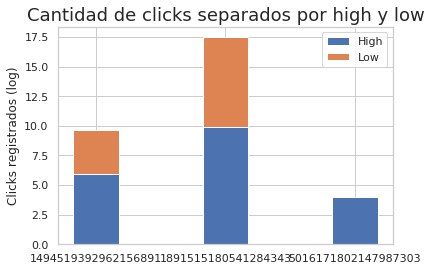

In [12]:
width = 0.35
grouped_high = clicks_por_ref.loc[clicks_por_ref['group'] == 'High']
grouped_low = clicks_por_ref.loc[clicks_por_ref['group'] == 'Low']
stacked_plot1 = plt.bar([0,1,2], grouped_high['suma'], width)
stacked_plot2 = plt.bar([0,1,2], grouped_low['suma'], width,
            bottom=grouped_high['suma'])

plt.ylabel('Clicks registrados (log)')
plt.title('Cantidad de clicks separados por high y low', fontsize=18)
plt.xticks([0,1,2], clicks_por_ref['ref_type'].unique())

plt.legend((stacked_plot1[0], stacked_plot2[0]), ('High', 'Low'))

#### Fig 3.1: Gráfico de la cantidad de clicks por plataforma divididos en <i>highs</i> y <i>lows</i>: